State:

In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str



Node definition:

In [ ]:
def start_play(state:State):
    print("Start play node has been called.")
    return {"graph_info":state["graph_info"]+" I am planning to play."}

def cricket(state:State):
    print("Cricket node has been called.")
    return {"graph_info":state["graph_info"]+" Cricket."}

def badminton(state:State):
    print("Badminton node has been called.")
    return {"graph_info":state["graph_info"]+" Badminton."}

In [4]:
import random
from typing import Literal

def random_play(state:State) -> Literal["cricket","badminton"]:
    if random.random() > 0.5:
        return "cricket"
    else:
        return "badminton"

design graph:

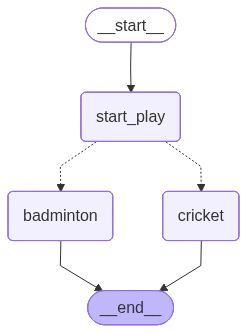

In [5]:
from IPython.display import Image, display
from langgraph.graph import StateGraph,START, END

##buid graph
graph=StateGraph(State)

##add all the nodes
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

##schedule the flow of the graph
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

##compile the graph
graph_builder=graph.compile()


##View graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [10]:
graph_builder.invoke({"graph_info":"My name is Prashant"})

Start play node has been called.
Cricket node has been called.


{'graph_info': 'My name is PrashantI am planning to play. Cricket.'}